In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import numpy as np
from collections import OrderedDict as OD
#import uproot3
import uproot
import hist
import matplotlib.pyplot as plt
import mplhep as hep

#sAnaVersion = 'QCD_fullHT'

sIpFiles = OD([
    # (<file name to refer>, <file path+name>)
    #(sAnaVersion, '/home/siddhesh/Work/CMS/htoaa/analysis/20230324_QCD_HT100to200/analyze_hadded_QCD_HT100to200.root')
    #(sAnaVersion, '/home/siddhesh/Work/CMS/htoaa/analysis/20230324_QCD/analyze_hadded_QCD.root')
    #(sAnaVersion, '')
    ('QCD_fullHT', '/home/siddhesh/Work/CMS/htoaa/analysis/20230406_QCD_wCorrectlyHandledQCDInclHT50to100/analysis_hadded_QCD.root')
    #('QCD_HT100to200', '/home/siddhesh/Work/CMS/htoaa/analysis/20230324_QCD/analyze_hadded_QCD_HT100to200.root')
    #('QCD_HT200to300', '/home/siddhesh/Work/CMS/htoaa/analysis/20230324_QCD/analyze_hadded_QCD_HT200to300.root')
    #('QCD_HT300to500', '/home/siddhesh/Work/CMS/htoaa/analysis/20230324_QCD/analyze_hadded_QCD_HT300to500.root')
    #('QCD_HT500to700', '/home/siddhesh/Work/CMS/htoaa/analysis/20230324_QCD/analyze_hadded_QCD_HT500to700.root')
    #('QCD_HT700to1000', '/home/siddhesh/Work/CMS/htoaa/analysis/20230324_QCD/analyze_hadded_QCD_HT700to1000.root')
    #('QCD_HT1000to1500', '/home/siddhesh/Work/CMS/htoaa/analysis/20230324_QCD/analyze_hadded_QCD_HT1000to1500.root')
    #('QCD_HT1500to2000', '/home/siddhesh/Work/CMS/htoaa/analysis/20230324_QCD/analyze_hadded_QCD_HT1500to2000.root')
    #('QCD_HT2000toInf', '/home/siddhesh/Work/CMS/htoaa/analysis/20230324_QCD/analyze_hadded_QCD_HT2000toInf.root')
    
])
sAnaVersion = list(sIpFiles.keys())[0]
print(f"sAnaVersion: {sAnaVersion}")

#sOpDir  = '/home/siddhesh/Work/CMS/htoaa/analysis/20230324_QCD_HT100to200/plots'
sOpDir  = '/home/siddhesh/Work/CMS/htoaa/analysis/20230406_QCD_wCorrectlyHandledQCDInclHT50to100/plots/%s' % (sAnaVersion)

if not os.path.exists(sOpDir):
    os.makedirs(sOpDir)
    
fIpFiles = OD()
for sIpFileName, sIpFileNameFull in sIpFiles.items():
    fIpFiles[sIpFileName] = uproot.open(sIpFileNameFull)

sAnaVersion: QCD_fullHT


plotNameNice: hGenBquark_leadingPt
sIpFileName_: QCD_fullHT,  sHistogramName_: evt/QCD_bEnrich/hGenBquark_leadingPt_QCDStitchCutBQuarkPt_central
sIpFileName_: QCD_fullHT,  sHistogramName_: evt/QCD_bGen/hGenBquark_leadingPt_QCDStitchCutBQuarkPt_central
sIpFileName_: QCD_fullHT,  sHistogramName_: evt/QCDIncl/hGenBquark_leadingPt_QCDStitchCutBQuarkPt_central
sIpFileName_: QCD_fullHT,  sHistogramName_: evt/QCD_bEnrich/hGenBquark_leadingPt_QCDStitchCutBHadron_central
sIpFileName_: QCD_fullHT,  sHistogramName_: evt/QCD_bGen/hGenBquark_leadingPt_QCDStitchCutBHadron_central
sIpFileName_: QCD_fullHT,  sHistogramName_: evt/QCDIncl/hGenBquark_leadingPt_QCDStitchCutBHadron_central
sIpFileName_: QCD_fullHT,  sHistogramName_: evt/QCD_bEnrich/hGenBquark_leadingPt_all_central
sIpFileName_: QCD_fullHT,  sHistogramName_: evt/QCD_bGen/hGenBquark_leadingPt_all_central
sIpFileName_: QCD_fullHT,  sHistogramName_: evt/QCDIncl/hGenBquark_leadingPt_all_central
yAxisRange: None,  yAxisRange_auto: [295129.569138

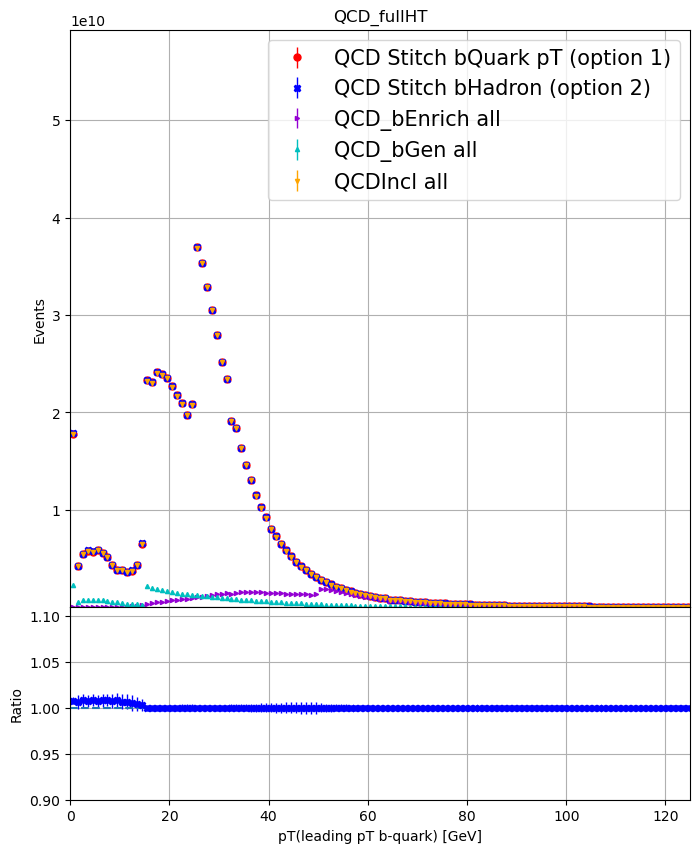

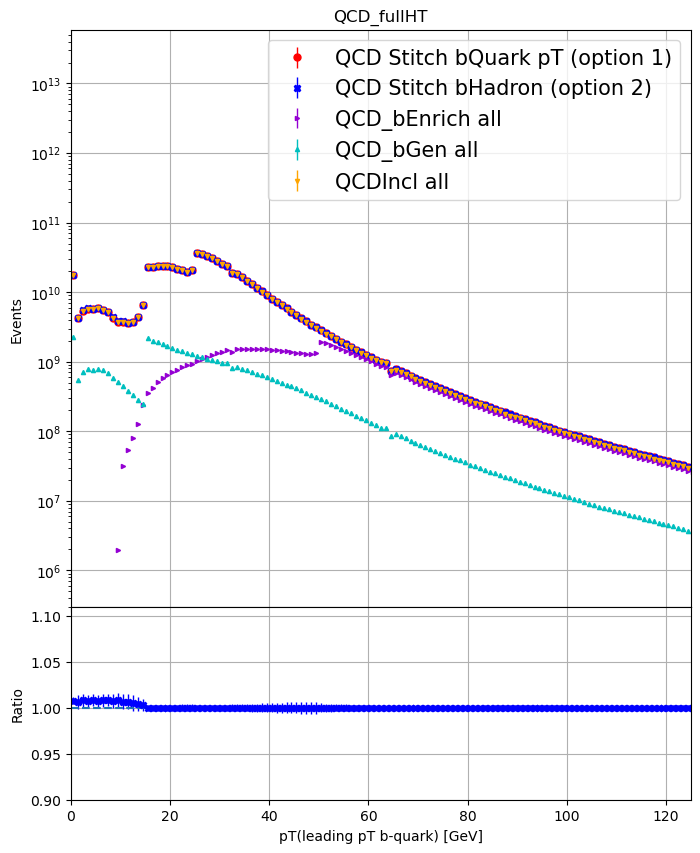

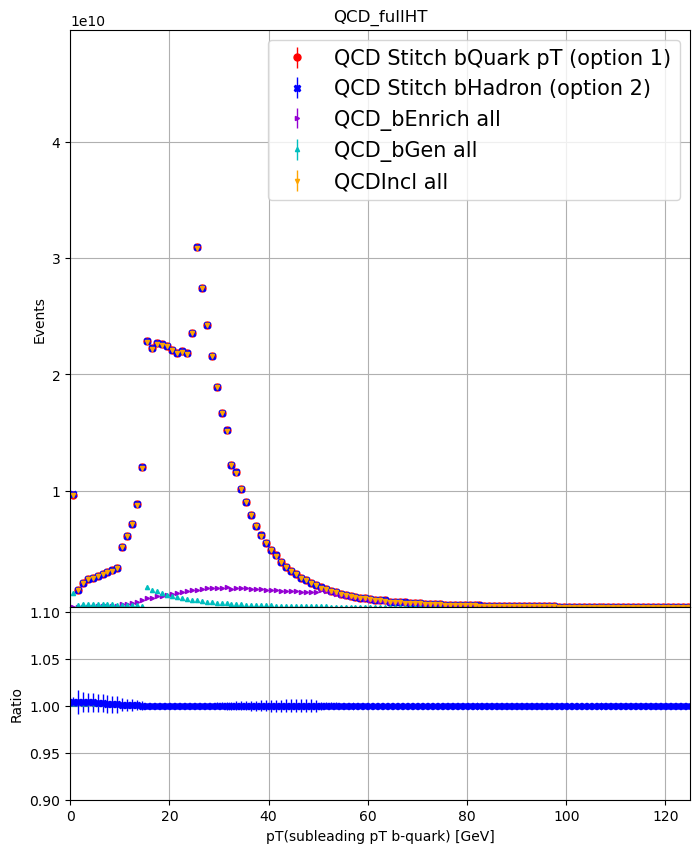

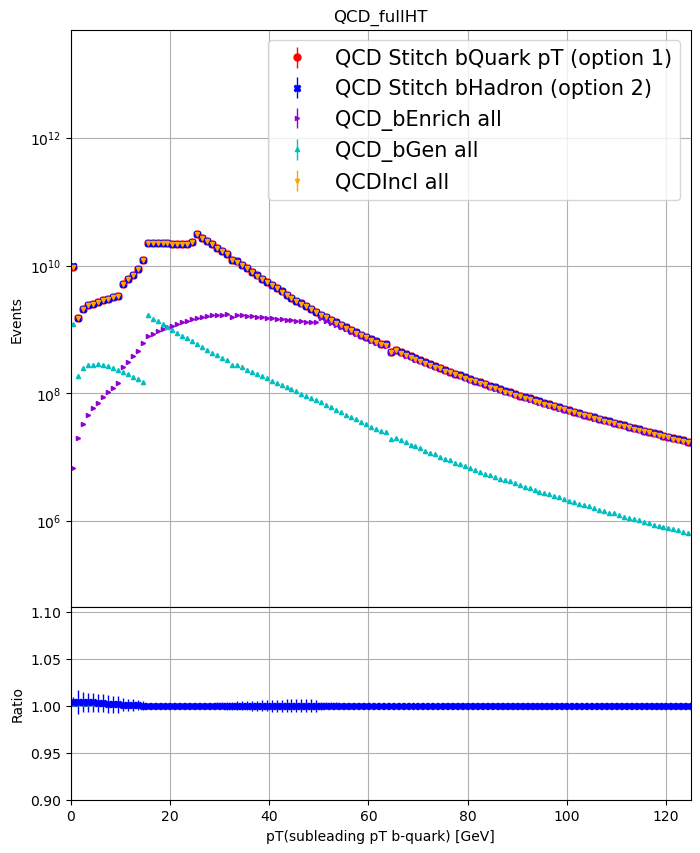

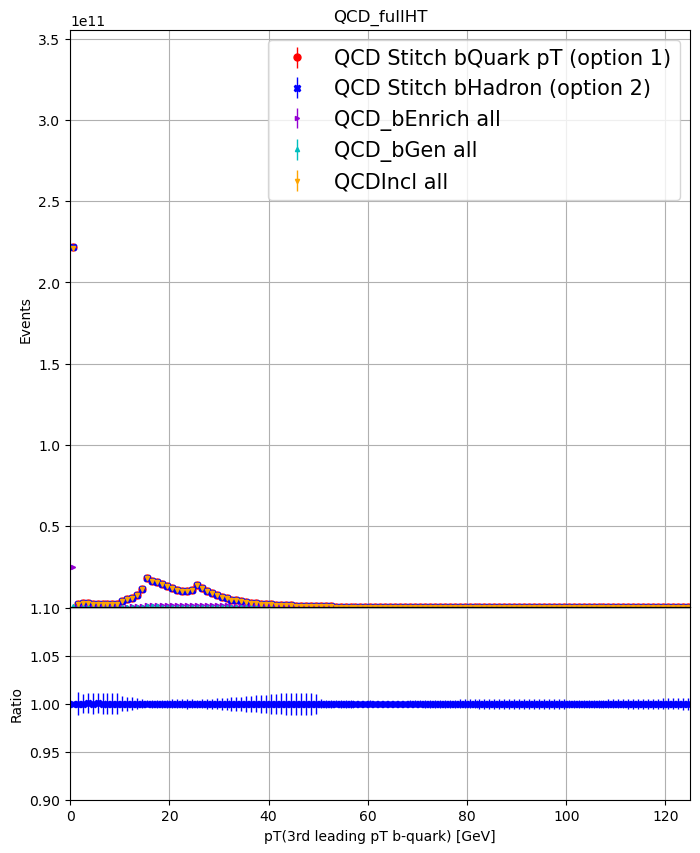

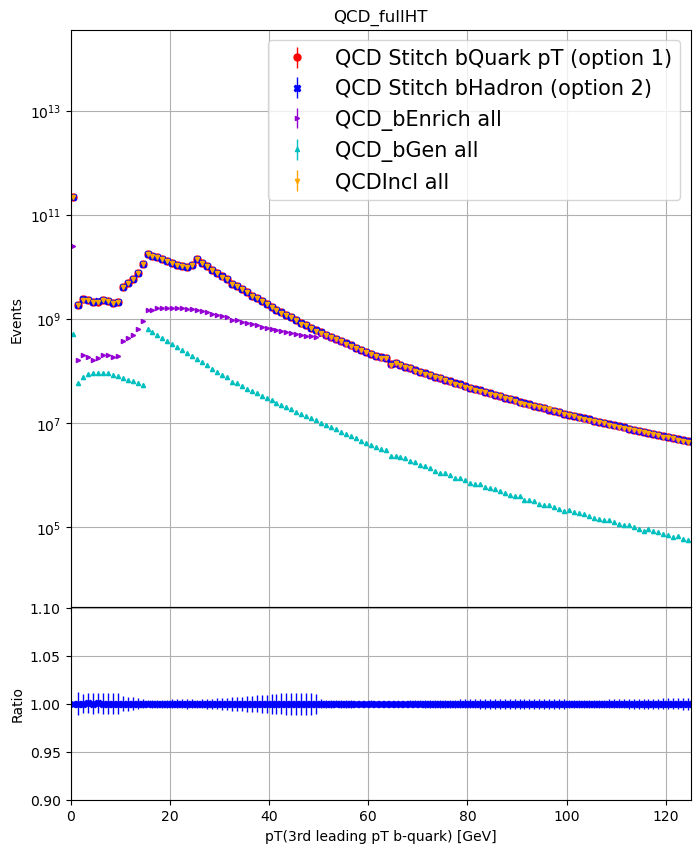

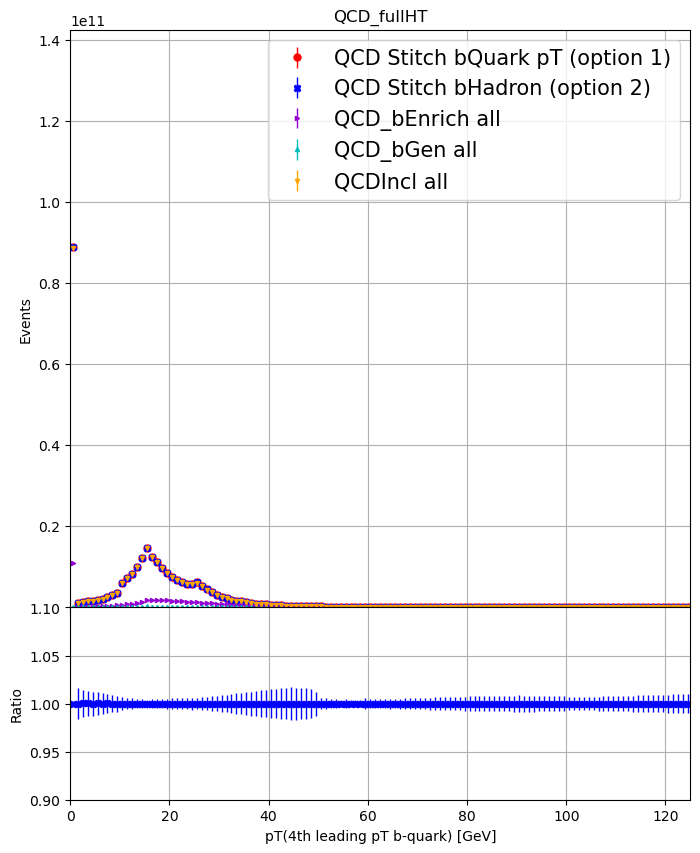

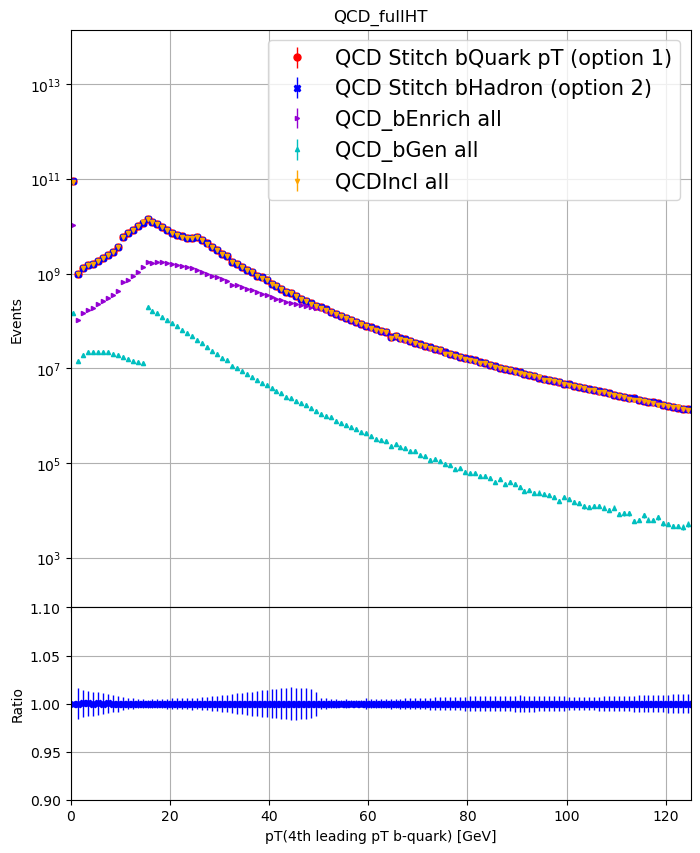

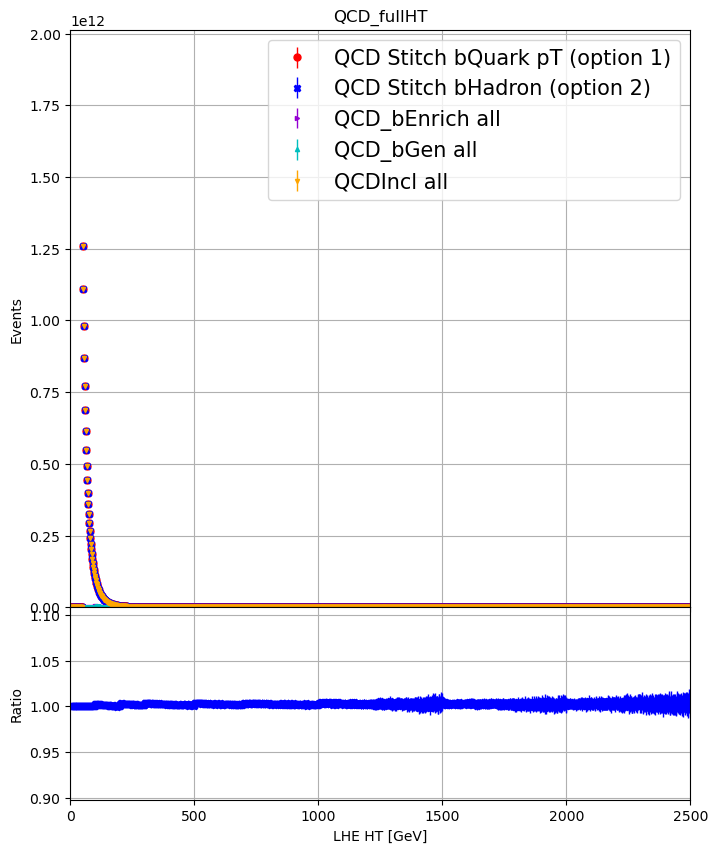

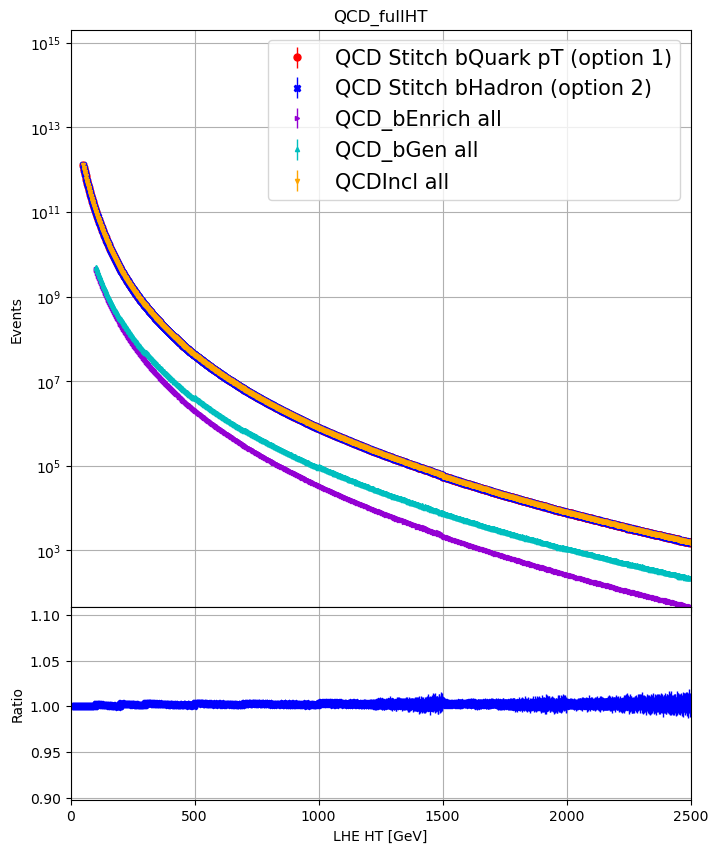

In [3]:
sXRange = "xAxisRange"; sYRange = "yAxisRange";
sXLabel = 'xAxisLabel'; sYLabel = 'yAxisLabel';
sNRebin = "nRebin"
sHistosToOverlay = 'histosToOverlay'
sHistosToHadd = 'histosToHadd'
sIpFileNameNice = 'ipFileNameNice'
sHistName   = 'histogramName'

era = 2018
luminosity = 59.83
cmsWorkStatus='Work in Progress'
sData = "" # "Data", "" 

histograms_dict = OD([
    #("hLeadingPtGenBquark_pt_all", {sXLabel: 'Leading FatJet mass [GeV]', sYLabel: 'Events', sXRange: [0, 200]}),
   
    ("hLeadingPtGenBquark_pt", {
        sXLabel: 'pT(pT leading b-quark) [GeV]', sYLabel: 'Events',
        sXRange: [0, 125],
        sNRebin: 2,
        sHistosToOverlay: OD([# ('h1', [{histoToOverlay1}]),  ('h2', [{histoToOverlay2}]), ('h3', [{histoTohadd3p1}, {histoTohadd3p2}, ...]), ('hi',[{}]), ...]
            ("QCD Stitch bQuark pT (option 1)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBquark_pt_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBquark_pt_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBquark_pt_QCDStitchCutBQuarkPt_central'},
            ]),
            ("QCD Stitch bHadron (option 2)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBquark_pt_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBquark_pt_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBquark_pt_QCDStitchCutBHadron_central'},
            ]),
            ("QCD_bEnrich all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBquark_pt_all_central'},
            ]),
            ("QCD_bGen all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBquark_pt_all_central'}
            ]),
            ("QCDIncl all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBquark_pt_all_central'}
            ]),
        ])
    }),    
    
    
    ("hLeadingPtGenBquark_eta", {
        sXLabel: 'eta(pT leading b-quark)', sYLabel: 'Events',
        sXRange: [-6, 6],
        sNRebin: 2,
        sHistosToOverlay: OD([# ('h1', [{histoToOverlay1}]),  ('h2', [{histoToOverlay2}]), ('h3', [{histoTohadd3p1}, {histoTohadd3p2}, ...]), ('hi',[{}]), ...]
            ("QCD Stitch bQuark pT (option 1)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBquark_eta_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBquark_eta_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBquark_eta_QCDStitchCutBQuarkPt_central'},
            ]),
            ("QCD Stitch bHadron (option 2)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBquark_eta_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBquark_eta_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBquark_eta_QCDStitchCutBHadron_central'},
            ]),
            ("QCD_bEnrich all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBquark_eta_all_central'},
            ]),
            ("QCD_bGen all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBquark_eta_all_central'}
            ]),
            ("QCDIncl all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBquark_eta_all_central'}
            ]),
        ])
    }),

    
   
    ("hLeadingPtGenBquarkHardSctred_pt", {
        sXLabel: 'pT(pT leading b-quark, pythia status 23) [GeV]', sYLabel: 'Events',
        sXRange: [0, 125],
        sNRebin: 2,
        sHistosToOverlay: OD([# ('h1', [{histoToOverlay1}]),  ('h2', [{histoToOverlay2}]), ('h3', [{histoTohadd3p1}, {histoTohadd3p2}, ...]), ('hi',[{}]), ...]
            ("QCD Stitch bQuark pT (option 1)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBquarkHardSctred_pt_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBquarkHardSctred_pt_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBquarkHardSctred_pt_QCDStitchCutBQuarkPt_central'},
            ]),
            ("QCD Stitch bHadron (option 2)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBquarkHardSctred_pt_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBquarkHardSctred_pt_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBquarkHardSctred_pt_QCDStitchCutBHadron_central'},
            ]),
            ("QCD_bEnrich all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBquarkHardSctred_pt_all_central'},
            ]),
            ("QCD_bGen all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBquarkHardSctred_pt_all_central'}
            ]),
            ("QCDIncl all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBquarkHardSctred_pt_all_central'}
            ]),
        ])
    }),        
    
    ("hLeadingPtGenBquarkHardSctred_eta", {
        sXLabel: 'eta(pT leading b-quark, pythia status 23)', sYLabel: 'Events',
        sXRange: [-6, 6],
        sNRebin: 2,
        sHistosToOverlay: OD([# ('h1', [{histoToOverlay1}]),  ('h2', [{histoToOverlay2}]), ('h3', [{histoTohadd3p1}, {histoTohadd3p2}, ...]), ('hi',[{}]), ...]
            ("QCD Stitch bQuark pT (option 1)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBquarkHardSctred_eta_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBquarkHardSctred_eta_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBquarkHardSctred_eta_QCDStitchCutBQuarkPt_central'},
            ]),
            ("QCD Stitch bHadron (option 2)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBquarkHardSctred_eta_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBquarkHardSctred_eta_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBquarkHardSctred_eta_QCDStitchCutBHadron_central'},
            ]),
            ("QCD_bEnrich all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBquarkHardSctred_eta_all_central'},
            ]),
            ("QCD_bGen all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBquarkHardSctred_eta_all_central'}
            ]),
            ("QCDIncl all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBquarkHardSctred_eta_all_central'}
            ]),
        ])
    }),

    
   
    ("hLeadingPtGenBHadron_pt", {
        sXLabel: 'pT(pT leading b-hadron) [GeV]', sYLabel: 'Events',
        sXRange: [0, 125],
        sNRebin: 2,
        sHistosToOverlay: OD([# ('h1', [{histoToOverlay1}]),  ('h2', [{histoToOverlay2}]), ('h3', [{histoTohadd3p1}, {histoTohadd3p2}, ...]), ('hi',[{}]), ...]
            ("QCD Stitch bQuark pT (option 1)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBHadron_pt_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBHadron_pt_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBHadron_pt_QCDStitchCutBQuarkPt_central'},
            ]),
            ("QCD Stitch bHadron (option 2)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBHadron_pt_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBHadron_pt_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBHadron_pt_QCDStitchCutBHadron_central'},
            ]),
            ("QCD_bEnrich all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBHadron_pt_all_central'},
            ]),
            ("QCD_bGen all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBHadron_pt_all_central'}
            ]),
            ("QCDIncl all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBHadron_pt_all_central'}
            ]),
        ])
    }),    
        
    ("hLeadingPtGenBHadron_eta", {
        sXLabel: 'eta(pT leading b-hadron)', sYLabel: 'Events',
        sXRange: [-6, 6],
        sNRebin: 2,
        sHistosToOverlay: OD([# ('h1', [{histoToOverlay1}]),  ('h2', [{histoToOverlay2}]), ('h3', [{histoTohadd3p1}, {histoTohadd3p2}, ...]), ('hi',[{}]), ...]
            ("QCD Stitch bQuark pT (option 1)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBHadron_eta_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBHadron_eta_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBHadron_eta_QCDStitchCutBQuarkPt_central'},
            ]),
            ("QCD Stitch bHadron (option 2)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBHadron_eta_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBHadron_eta_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBHadron_eta_QCDStitchCutBHadron_central'},
            ]),
            ("QCD_bEnrich all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBHadron_eta_all_central'},
            ]),
            ("QCD_bGen all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBHadron_eta_all_central'}
            ]),
            ("QCDIncl all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBHadron_eta_all_central'}
            ]),
        ])
    }),
    

   
    ("hLeadingPtGenBHadronStatus2_pt", {
        sXLabel: 'pT(pT leading b-hadron with status=2) [GeV]', sYLabel: 'Events',
        sXRange: [0, 125],
        sNRebin: 2,
        sHistosToOverlay: OD([# ('h1', [{histoToOverlay1}]),  ('h2', [{histoToOverlay2}]), ('h3', [{histoTohadd3p1}, {histoTohadd3p2}, ...]), ('hi',[{}]), ...]
            ("QCD Stitch bQuark pT (option 1)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBHadronStatus2_pt_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBHadronStatus2_pt_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBHadronStatus2_pt_QCDStitchCutBQuarkPt_central'},
            ]),
            ("QCD Stitch bHadron (option 2)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBHadronStatus2_pt_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBHadronStatus2_pt_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBHadronStatus2_pt_QCDStitchCutBHadron_central'},
            ]),
            ("QCD_bEnrich all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBHadronStatus2_pt_all_central'},
            ]),
            ("QCD_bGen all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBHadronStatus2_pt_all_central'}
            ]),
            ("QCDIncl all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBHadronStatus2_pt_all_central'}
            ]),
        ])
    }),    
    
    
    ("hLeadingPtGenBHadronStatus2_eta", {
        sXLabel: 'eta(pT leading b-hadron with status=2)', sYLabel: 'Events',
        sXRange: [-6, 6],
        sNRebin: 2,
        sHistosToOverlay: OD([# ('h1', [{histoToOverlay1}]),  ('h2', [{histoToOverlay2}]), ('h3', [{histoTohadd3p1}, {histoTohadd3p2}, ...]), ('hi',[{}]), ...]
            ("QCD Stitch bQuark pT (option 1)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBHadronStatus2_eta_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBHadronStatus2_eta_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBHadronStatus2_eta_QCDStitchCutBQuarkPt_central'},
            ]),
            ("QCD Stitch bHadron (option 2)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBHadronStatus2_eta_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBHadronStatus2_eta_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBHadronStatus2_eta_QCDStitchCutBHadron_central'},
            ]),
            ("QCD_bEnrich all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBHadronStatus2_eta_all_central'},
            ]),
            ("QCD_bGen all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hLeadingPtGenBHadronStatus2_eta_all_central'}
            ]),
            ("QCDIncl all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hLeadingPtGenBHadronStatus2_eta_all_central'}
            ]),
        ])
    }),
    
    
    
    ("hGenBquark_leadingPt", {
        sXLabel: 'pT(leading pT b-quark) [GeV]', sYLabel: 'Events',
        sXRange: [0, 125],
        sNRebin: 2,
        sHistosToOverlay: OD([# ('h1', [{histoToOverlay1}]),  ('h2', [{histoToOverlay2}]), ('h3', [{histoTohadd3p1}, {histoTohadd3p2}, ...]), ('hi',[{}]), ...]
            ("QCD Stitch bQuark pT (option 1)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hGenBquark_leadingPt_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hGenBquark_leadingPt_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hGenBquark_leadingPt_QCDStitchCutBQuarkPt_central'},
            ]),
            ("QCD Stitch bHadron (option 2)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hGenBquark_leadingPt_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hGenBquark_leadingPt_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hGenBquark_leadingPt_QCDStitchCutBHadron_central'},
            ]),
            ("QCD_bEnrich all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hGenBquark_leadingPt_all_central'},
            ]),
            ("QCD_bGen all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hGenBquark_leadingPt_all_central'}
            ]),
            ("QCDIncl all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hGenBquark_leadingPt_all_central'}
            ]),
        ])
    }),    
   
    ("hGenBquark_subleadingPt", {
        sXLabel: 'pT(subleading pT b-quark) [GeV]', sYLabel: 'Events',
        sXRange: [0, 125],
        sNRebin: 2,
        sHistosToOverlay: OD([# ('h1', [{histoToOverlay1}]),  ('h2', [{histoToOverlay2}]), ('h3', [{histoTohadd3p1}, {histoTohadd3p2}, ...]), ('hi',[{}]), ...]
            ("QCD Stitch bQuark pT (option 1)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hGenBquark_subleadingPt_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hGenBquark_subleadingPt_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hGenBquark_subleadingPt_QCDStitchCutBQuarkPt_central'},
            ]),
            ("QCD Stitch bHadron (option 2)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hGenBquark_subleadingPt_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hGenBquark_subleadingPt_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hGenBquark_subleadingPt_QCDStitchCutBHadron_central'},
            ]),
            ("QCD_bEnrich all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hGenBquark_subleadingPt_all_central'},
            ]),
            ("QCD_bGen all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hGenBquark_subleadingPt_all_central'}
            ]),
            ("QCDIncl all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hGenBquark_subleadingPt_all_central'}
            ]),
        ])
    }),    
   
    ("hGenBquark_thirdLeadingPt", {
        sXLabel: 'pT(3rd leading pT b-quark) [GeV]', sYLabel: 'Events',
        sXRange: [0, 125],
        sNRebin: 2,
        sHistosToOverlay: OD([# ('h1', [{histoToOverlay1}]),  ('h2', [{histoToOverlay2}]), ('h3', [{histoTohadd3p1}, {histoTohadd3p2}, ...]), ('hi',[{}]), ...]
            ("QCD Stitch bQuark pT (option 1)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hGenBquark_thirdLeadingPt_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hGenBquark_thirdLeadingPt_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hGenBquark_thirdLeadingPt_QCDStitchCutBQuarkPt_central'},
            ]),
            ("QCD Stitch bHadron (option 2)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hGenBquark_thirdLeadingPt_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hGenBquark_thirdLeadingPt_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hGenBquark_thirdLeadingPt_QCDStitchCutBHadron_central'},
            ]),
            ("QCD_bEnrich all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hGenBquark_thirdLeadingPt_all_central'},
            ]),
            ("QCD_bGen all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hGenBquark_thirdLeadingPt_all_central'}
            ]),
            ("QCDIncl all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hGenBquark_thirdLeadingPt_all_central'}
            ]),
        ])
    }),    
    
    ("hGenBquark_forthLeadingPt", {
        sXLabel: 'pT(4th leading pT b-quark) [GeV]', sYLabel: 'Events',
        sXRange: [0, 125],
        sNRebin: 2,
        sHistosToOverlay: OD([# ('h1', [{histoToOverlay1}]),  ('h2', [{histoToOverlay2}]), ('h3', [{histoTohadd3p1}, {histoTohadd3p2}, ...]), ('hi',[{}]), ...]
            ("QCD Stitch bQuark pT (option 1)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hGenBquark_forthLeadingPt_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hGenBquark_forthLeadingPt_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hGenBquark_forthLeadingPt_QCDStitchCutBQuarkPt_central'},
            ]),
            ("QCD Stitch bHadron (option 2)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hGenBquark_forthLeadingPt_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hGenBquark_forthLeadingPt_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hGenBquark_forthLeadingPt_QCDStitchCutBHadron_central'},
            ]),
            ("QCD_bEnrich all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hGenBquark_forthLeadingPt_all_central'},
            ]),
            ("QCD_bGen all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hGenBquark_forthLeadingPt_all_central'}
            ]),
            ("QCDIncl all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hGenBquark_forthLeadingPt_all_central'}
            ]),
        ])
    }),    
    
   
    
    ("hGenLHE_HT", {
        sXLabel: 'LHE HT [GeV]', sYLabel: 'Events',
        sXRange: [0, 2500],
        sNRebin: 2,
        sHistosToOverlay: OD([# ('h1', [{histoToOverlay1}]),  ('h2', [{histoToOverlay2}]), ('h3', [{histoTohadd3p1}, {histoTohadd3p2}, ...]), ('hi',[{}]), ...]
            ("QCD Stitch bQuark pT (option 1)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hGenLHE_HT_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hGenLHE_HT_QCDStitchCutBQuarkPt_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hGenLHE_HT_QCDStitchCutBQuarkPt_central'},
            ]),
            ("QCD Stitch bHadron (option 2)", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hGenLHE_HT_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hGenLHE_HT_QCDStitchCutBHadron_central'},
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hGenLHE_HT_QCDStitchCutBHadron_central'},
            ]),
            ("QCD_bEnrich all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bEnrich/hGenLHE_HT_all_central'},
            ]),
            ("QCD_bGen all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCD_bGen/hGenLHE_HT_all_central'}
            ]),
            ("QCDIncl all", [
                {sIpFileNameNice: sAnaVersion, sHistName: 'evt/QCDIncl/hGenLHE_HT_all_central'}
            ]),
        ])
    }),    
    
    
])

#systematics_list = ['central']
marker_color_list = ['r', 'b', 'darkviolet', 'c', 'orange', 'green']
marker_style_list = ["o", "X", '>', '^', 'v', "s", "+", 'x', '*']
marker_size_list  = [5, 5, 3, 3, 3, 3, 2, 2, 2]
                
normalize_histogram = False
makeRatioPlot = True

printLevel = 3
skip_plotNameNice = [
    "hLeadingPtGenBquark_pt",
    "hLeadingPtGenBquark_eta",
    "hLeadingPtGenBquarkHardSctred_pt",
    "hLeadingPtGenBquarkHardSctred_eta",
    "hLeadingPtGenBHadron_pt",
    "hLeadingPtGenBHadron_eta",
    "hLeadingPtGenBHadronStatus2_pt",
    "hLeadingPtGenBHadronStatus2_eta",
]

for plotNameNice in histograms_dict.keys():
    if plotNameNice in skip_plotNameNice: continue
    
    if printLevel >= 0:
        print(f"plotNameNice: {plotNameNice}")
    
    xAxisLabel = histograms_dict[plotNameNice][sXLabel] if sXLabel in list(histograms_dict[plotNameNice].keys()) else None
    yAxisLabel = histograms_dict[plotNameNice][sYLabel] if sYLabel in list(histograms_dict[plotNameNice].keys()) else None
    xAxisRange = histograms_dict[plotNameNice][sXRange] if sXRange in list(histograms_dict[plotNameNice].keys()) else None
    yAxisRange = histograms_dict[plotNameNice][sYRange] if sYRange in list(histograms_dict[plotNameNice].keys()) else None    
        
    nRebins = histograms_dict[plotNameNice][sNRebin] if sNRebin in list(histograms_dict[plotNameNice].keys()) else 1
    
    #print(f"xAxisLabel: {xAxisLabel}, yAxisLabel: {yAxisLabel}, xAxisRange: {xAxisRange}, yAxisRange: {yAxisRange}, nRebins: {nRebins} ")
    
    histosToOverlay = OD()
    yAxisRange_auto = [1e10, -1e10]
    #for iHistoToOverlay_name in range(len(histograms_dict[plotNameNice][sHistosToOverlay])):
    for iHistoToOverlay_name in histograms_dict[plotNameNice][sHistosToOverlay].keys():
        #print(f"iHistoToOverlay_name: {iHistoToOverlay_name}")
        
        histosToOverlay[iHistoToOverlay_name] = None
        h_added = None
        h = []
        for iHistoToHadd in range(len(histograms_dict[plotNameNice][sHistosToOverlay][iHistoToOverlay_name])):
            
            sIpFileName_    = histograms_dict[plotNameNice][sHistosToOverlay][iHistoToOverlay_name][iHistoToHadd][sIpFileNameNice]
            fIp_            = fIpFiles[sIpFileName_]
            sHistogramName_ = histograms_dict[plotNameNice][sHistosToOverlay][iHistoToOverlay_name][iHistoToHadd][sHistName]
            h_ = fIp_[sHistogramName_]
            h1_ = h_.to_hist()
            
            h1Rebin_ = None
            if   nRebins == 1:
                h1Rebin_ = h1_
            elif   nRebins == 2:
                h1Rebin_ = h1_[::2j]
            elif nRebins == 3:
                h1Rebin_ = h1_[::3j]
            elif nRebins == 4:
                h1Rebin_ = h1_[::4j]
            elif nRebins == 5:
                h1Rebin_ = h1_[::5j]
            elif nRebins == 6:
                h1Rebin_ = h1_[::6j]
            elif nRebins == 10:
                h1Rebin_ = h1_[::10j]
            elif nRebins == 20:
                h1Rebin_ = h1_[::20j]
            elif nRebins == 40:
                h1Rebin_ = h1_[::40j]
            elif nRebins == 50:
                h1Rebin_ = h1_[::50j]
            elif nRebins == 100:
                h1Rebin_ = h1_[::100j]
            else:
                print(f"nRebins={nRebins} is not yet implemented... Implement it \t\t **** ERROR ****")
                break
                
            if   nRebins > 1:    
                h1_ = h1Rebin_
            
            if printLevel >= 0:
                print(f"sIpFileName_: {sIpFileName_},  sHistogramName_: {sHistogramName_}")
            '''
            print(f"h_ ({type(h_)}): {h_}")
            #print(f"h1_ ({type(h1_)}): {h1_}")
            print(f"h1_ ({type(h1_)})")
            print(f"h1_.values() ({type(h1_.values())}) ({len(h1_.values())}) {h1_.values()}")
            print(f"\nh1_.variances() ({type(h1_.variances())}) ({len(h1_.variances())}) {h1_.variances()}")
            
            print(f"h1_.view() ({type(h1_.view())}) ({len(h1_.view())}): {h1_.view()}")
            '''
            
            if printLevel >= 5:
                #print(f"h1_ ({type(h1_)}): {h1_}")
                print(f"h1_.values() ({type(h1_.values())}) ({len(h1_.values())}) {h1_.values()}")
                print(f"\nh1_.variances() ({type(h1_.variances())}) ({len(h1_.variances())}) {h1_.variances()}")
            
            
            h.append( h1_ )
            
            #if h_added == None:
            if histosToOverlay[iHistoToOverlay_name] == None:
                #h_added = h1_
                histosToOverlay[iHistoToOverlay_name] = h1_
            else:
                #h_added = h_added + h1_
                histosToOverlay[iHistoToOverlay_name] = histosToOverlay[iHistoToOverlay_name] + h1_
                
            #print(f"\n\nh_added.view() ({type(h_added.view())}) ({len(h_added.view())}): {h_added.view()}")
            
        if printLevel >= 10:
            print(f"histosToOverlay[{iHistoToOverlay_name}].values(): {histosToOverlay[iHistoToOverlay_name].values()}")
            print(f"histosToOverlay[{iHistoToOverlay_name}].variances(): {histosToOverlay[iHistoToOverlay_name].variances()}")
        yLow_ = histosToOverlay[iHistoToOverlay_name].values() - np.sqrt(histosToOverlay[iHistoToOverlay_name].variances())
        
        if yLow_[np.nonzero(yLow_)].shape[0] == 0: continue
            
        #yMin_ = np.amin( histosToOverlay[iHistoToOverlay_name].values() - np.sqrt(histosToOverlay[iHistoToOverlay_name].variances()) )
        yMin_ = np.amin( yLow_[np.nonzero(yLow_)] ) 
        yMax_ = np.amax( histosToOverlay[iHistoToOverlay_name].values() + np.sqrt(histosToOverlay[iHistoToOverlay_name].variances()) )
            
        yAxisRange_auto[0] = yMin_ if yMin_ < yAxisRange_auto[0] else yAxisRange_auto[0]
        yAxisRange_auto[1] = yMax_ if yMax_ > yAxisRange_auto[1] else yAxisRange_auto[1]
        
        #print(f"yAxisRange_auto: {yAxisRange_auto}, yMin_: {yMin_}, yMax_: {yMax_}, ")
        #print(f"histosToOverlay[iHistoToOverlay_name].values() - np.sqrt(histosToOverlay[iHistoToOverlay_name].variances() ({type(histosToOverlay[iHistoToOverlay_name].values() - np.sqrt(histosToOverlay[iHistoToOverlay_name].variances()))}): {histosToOverlay[iHistoToOverlay_name].values() - np.sqrt(histosToOverlay[iHistoToOverlay_name].variances())}")
        
        
        
      
    #hStack_list = [ hBkg_list[idx] for idx in idx_hBkg_sortedByIntegral ]  
    #sStack_list = [ sBkg_list[idx] for idx in idx_hBkg_sortedByIntegral ]  
    #print(f"histosToOverlay.values() ({type(histosToOverlay.values())}): histosToOverlay.values()")
    #print(f"list(histosToOverlay.values()) ({type(list(histosToOverlay.values()))}): list(histosToOverlay.values())")
    #print(f"histosToOverlay[0].values() ({type(histosToOverlay[0].values())}): {histosToOverlay[0].values()}")
    
    histosToOverlay_values_list    = np.array( [ histosToOverlay[iHistoToOverlay].values() for iHistoToOverlay in histosToOverlay.keys() ] )
    histosToOverlay_error_list     = np.array( [ np.sqrt(histosToOverlay[iHistoToOverlay].variances()) for iHistoToOverlay in histosToOverlay.keys() ] )
    histosToOverlay_binEdges       = histosToOverlay[list(histosToOverlay.keys())[0]].axes[0].edges
    histosToOverlay_name_list      = list(histosToOverlay.keys())
    #print(f"histosToOverlay_binEdges ({type(histosToOverlay_binEdges)}) ({len(histosToOverlay_binEdges)}): {histosToOverlay_binEdges}")
    
    if printLevel >= 3:
        print(f"yAxisRange: {yAxisRange},  yAxisRange_auto: {yAxisRange_auto}")

    for yAxisScale in ['linearY', 'logY']: #['linearY', 'logY']: # ['linearY']
        
        #fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,10), sharex='col', gridspec_kw={'height_ratios': [3, 1]}, subplot_kw={'ymargin': 0.4})
        fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8,10), sharex='col', gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})

        '''
        hep.histplot(histosToOverlay_values_list, bins=histosToOverlay_binEdges, yerr=histosToOverlay_error_list, 
                     label=histosToOverlay_name_list, 
                     ax=ax[0], 
                     histtype='errorbar', 
                     density=normalize_histogram,
                     markersize=3,
                     marker='o' #marker_style_list
                    )
        '''
        
        for iHistoToOverlay in range(len(histosToOverlay_name_list)):
            hep.histplot(
                histosToOverlay_values_list[iHistoToOverlay], bins=histosToOverlay_binEdges, yerr=histosToOverlay_error_list[iHistoToOverlay], 
                label=histosToOverlay_name_list[iHistoToOverlay], 
                ax=ax[0], 
                histtype='errorbar', 
                density=normalize_histogram,
                color=marker_color_list[iHistoToOverlay], #'r',
                markersize=marker_size_list[iHistoToOverlay], #3,
                marker=marker_style_list[iHistoToOverlay] #marker_style_list
            )
            
            
        
        if yAxisRange:
            yAxisRange_toUse = yAxisRange
        else:
            yAxisRange_toUse = yAxisRange_auto
            if yAxisScale == 'logY':
                yAxisRange_toUse[1] = yAxisRange_toUse[1] * 1e3
            else:
                yAxisRange_toUse[1] = yAxisRange_toUse[1] * 1.6
        
        if not normalize_histogram:
            #print(f"yAxisRange_toUse: {yAxisRange_toUse},  yAxisRange: {yAxisRange}, yAxisRange_auto: {yAxisRange_auto}")
            ax[0].set_ylim(yAxisRange_toUse[0], yAxisRange_toUse[1])
        if xAxisRange: ax[0].set_xlim(xAxisRange[0], xAxisRange[1])
        if xAxisLabel: ax[0].set_xlabel(xAxisLabel)
        if xAxisLabel: ax[1].set_xlabel(xAxisLabel)
        if yAxisLabel: ax[0].set_ylabel(yAxisLabel)
        ax[1].set_ylabel("Ratio")
        ax[0].grid(True)
        ax[1].grid(True)
        
        
        # Ratio plot ---------------------------------------------------------------------
        if makeRatioPlot:
            yAxisRange_RatioPlot_auto = [1e10, -1e10]
            #for iHistoToOverlay in range(1, len(histosToOverlay_name_list)):
            for iHistoToOverlay in range(1, 2):
                N_values = histosToOverlay_values_list[iHistoToOverlay]
                D_values = histosToOverlay_values_list[0]
                N_errors = histosToOverlay_error_list[iHistoToOverlay]
                D_errors = histosToOverlay_error_list[0]
                
                ratio_values = np.divide(N_values, D_values, where=D_values!=0, out=np.ones(len(D_values)))
                ratio_error  = N_errors            
                ratio_error  = np.divide(ratio_error, D_values, where=D_values!=0, out=np.zeros(len(D_values)))

                #print(f"ratio_values ({type(ratio_values)}) ({len(ratio_values)}): {ratio_values}")
                #print(f"ratio_error ({type(ratio_error)}) ({len(ratio_error)}): {ratio_error}")
                    
                hep.histplot(
                    ratio_values, bins=histosToOverlay_binEdges, yerr=ratio_error, 
                    #label=histosToOverlay_name_list[iHistoToOverlay], 
                    ax=ax[1], 
                    histtype='errorbar', 
                    #density=normalize_histogram,
                    color=marker_color_list[iHistoToOverlay], #'r',
                    markersize=marker_size_list[iHistoToOverlay], #3,
                    marker=marker_style_list[iHistoToOverlay] #marker_style_list
                )
                
                yLow_ = ratio_values # ratio_values - ratio_error
                yUp_  = ratio_values # ratio_values + ratio_error
                yMin_ = np.amin( yLow_[np.nonzero(yLow_)] )
                yMax_ = np.amax( yUp_ )
            
                yAxisRange_RatioPlot_auto[0] = yMin_ if yMin_ < yAxisRange_RatioPlot_auto[0] else yAxisRange_RatioPlot_auto[0]
                yAxisRange_RatioPlot_auto[1] = yMax_ if yMax_ > yAxisRange_RatioPlot_auto[1] else yAxisRange_RatioPlot_auto[1]

    
            if xAxisRange: ax[1].set_xlim(xAxisRange[0], xAxisRange[1])
            ax[1].set_ylim(0, 2)
            ax[1].set_ylim(yAxisRange_RatioPlot_auto[0] * 0.9, yAxisRange_RatioPlot_auto[1] * 1.1)
            if xAxisLabel: ax[1].set_xlabel(xAxisLabel)
            #if yAxisLabel: ax[1].set_xlabel(xAxisLabel)
            ax[1].set_ylabel('Ratio')
                
            ax[1].axhline(y=1, linestyle='--')

    
    
        ax[0].legend(fontsize=15, loc='upper right', ncol=1)
        if yAxisScale == 'logY': ax[0].set_yscale('log', base=10)
        #ax[0].set_ymargin(1)

        #hep.cms.label(ax=ax[0], data=True if sData else False, year=era, lumi=luminosity, label=cmsWorkStatus, fontsize=14)
        ax[0].set_title(sAnaVersion)

        fig.savefig('%s/%s_%s.png' % (sOpDir, plotNameNice, yAxisScale), transparent=False, dpi=200, bbox_inches="tight")
        

